In [3]:
#tensorflow_version 2.x
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
#matplotlib inline

2022-05-28 05:29:50.639838: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-28 05:29:50.639892: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=CAD&limit=2000')
print(res)
hist = pd.DataFrame(json.loads(res.content)['Data'])
'''
predictive = {"time":[]}
for i in range(100):
    predictive["time"].append(hist["time"][2000] + (i+1)*86400)
    
predictive = pd.DataFrame(predictive)
print(predictive)
hist = pd.concat([hist,predictive],ignore_index = True)
print(hist)
'''
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'


<Response [200]>


In [5]:
print(hist)


                high       low      open  volumefrom    volumeto     close  \
time                                                                         
2016-12-05   1017.00    994.00   1017.00     241.400   243283.25   1008.82   
2016-12-06   1010.99    998.16   1008.82     227.020   229523.69   1010.00   
2016-12-07   1017.63   1000.01   1010.00     268.430   272126.46   1010.74   
2016-12-08   1018.00   1003.01   1010.74     307.080   311941.36   1017.97   
2016-12-09   1025.02   1007.16   1017.97     372.940   380489.77   1025.00   
...              ...       ...       ...         ...         ...       ...   
2022-05-24  38171.58  36642.62  37161.03      83.640  3110028.03  37995.98   
2022-05-25  38663.05  37762.72  37995.98      70.780  2694899.44  37858.57   
2022-05-26  38279.17  35953.99  37858.57     131.410  4896654.47  37326.95   
2022-05-27  37464.46  35991.39  37326.95      67.470  2476923.77  36329.47   
2022-05-28  36641.60  36294.80  36329.47       9.817   357550.45

In [6]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [7]:
 
predictive = hist[-50:]
hist = hist[:-50]

predictive


,high,low,open,volumefrom,volumeto,close
time,,,,,,
2022-04-09,53820.77,53006.04,53161.75,17.640,941149.63,53820.77
2022-04-10,54595.38,52716.67,53820.77,56.040,3003317.28,53013.85
2022-04-11,53381.10,49590.60,53013.85,92.370,4776983.22,49922.75
2022-04-12,51338.45,49651.18,49922.75,49.700,2507487.58,50668.53
2022-04-13,52144.06,50012.74,50668.53,83.640,4297716.25,51644.07
2022-04-14,52030.12,49952.71,51644.07,49.870,2531964.41,50337.24
2022-04-15,51375.40,50199.40,50337.24,47.640,2413953.57,51143.98
2022-04-16,51308.68,50499.66,51143.98,22.710,1156871.66,50902.43
2022-04-17,51047.56,49846.61,50902.43,30.770,1557315.69,49966.46


In [8]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [9]:
train, test = train_test_split(hist, test_size=0.1)

In [10]:
train

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2016-12-05,1017.00,994.00,1017.00,241.40,2.432832e+05,1008.82
2016-12-06,1010.99,998.16,1008.82,227.02,2.295237e+05,1010.00
2016-12-07,1017.63,1000.01,1010.00,268.43,2.721265e+05,1010.74
2016-12-08,1018.00,1003.01,1010.74,307.08,3.119414e+05,1017.97
2016-12-09,1025.02,1007.16,1017.97,372.94,3.804898e+05,1025.00
...,...,...,...,...,...,...
2021-09-21,55723.85,50674.68,54911.22,4122.36,2.222962e+08,52029.99
2021-09-22,56102.05,51836.92,52029.99,6212.73,3.387031e+08,55513.23
2021-09-23,57082.70,54788.01,55513.23,6672.36,3.735762e+08,56662.02


In [11]:
test

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2021-09-26,55724.27,51372.51,53831.67,6752.90,3.656866e+08,54810.59
2021-09-27,56138.07,53025.20,54810.59,6428.84,3.531715e+08,53089.70
2021-09-28,54047.11,51712.09,53089.70,6795.21,3.603991e+08,52178.05
2021-09-29,54169.54,51557.43,52178.05,6474.43,3.438829e+08,53100.84
2021-09-30,55960.20,52646.04,53100.84,5817.95,3.196995e+08,55743.46
...,...,...,...,...,...,...
2022-04-04,58465.16,56525.94,58149.66,46.76,2.694574e+06,58211.09
2022-04-05,58671.92,56754.44,58211.09,33.10,1.903633e+06,56797.23
2022-04-06,56832.78,54154.34,56797.23,79.15,4.371574e+06,54264.95


In [12]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

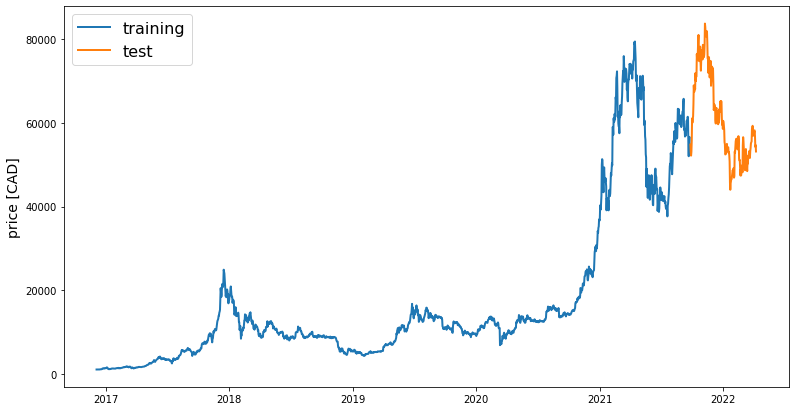

In [13]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [14]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [15]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [16]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.1):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [17]:
def build_lstm_model(input_data, output_size, neurons=300, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [18]:
np.random.seed(42)
window_len = 5
test_size = 0.1
zero_base = True
lstm_neurons = 300
epochs = 50
batch_size = 36
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [19]:
train, test, X_train, X_test, y_train, y_test = prepare_data(hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [20]:
print(X_test)
model = build_lstm_model(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,optimizer=optimizer)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
print(type(model))
print(type(history))
print(type(history.history))


[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 7.42584874e-03  3.21707076e-02  1.81848343e-02 -4.79882717e-02
   -3.42234601e-02 -3.13970348e-02]
  [-3.00974782e-02  6.61015006e-03 -1.37831503e-02  6.26545632e-03
   -1.44591260e-02 -4.80297694e-02]
  [-2.79004104e-02  3.59959052e-03 -3.07183485e-02 -4.12370981e-02
   -5.96238959e-02 -3.11937894e-02]
  [ 4.23388229e-03  2.47901066e-02 -1.35762089e-02 -1.38451628e-01
   -1.25755414e-01  1.70198861e-02]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-3.72467383e-02 -2.47638859e-02 -3.13970348e-02  5.69885080e-02
    2.04647072e-02 -1.71718808e-02]
  [-3.50658653e-02 -2.76806122e-02 -4.80297694e-02  7.09148151e-03
   -2.63005310e-02  2.09833546e-04]
  [-3.16843810e-03 -7.15056237e-03 -3.11937894e-02 -9.50233635e-02
   -9.47754998e-02  4.99863439e-02]
  [ 9.51584192e-02  3.48077895e-02  1.70198861e-02  3.09527069e-02
    

2022-05-28 05:29:56.696049: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-28 05:29:56.696080: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-28 05:29:56.696100: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (init13-projectanalysisa-5tvmksfd1o6): /proc/driver/nvidia/version does not exist
2022-05-28 05:29:56.696314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
49/49 [==============================] - 2s 17ms/step - loss: 0.0085 - val_loss: 0.0035
Epoch 2/50
49/49 [==============================] - 0s 7ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 3/50
49/49 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 4/50
49/49 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 5/50
49/49 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 6/50
49/49 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 7/50
49/49 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 8/50
49/49 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 9/50
49/49 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 10/50
49/49 [==============================] - 0s 8ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 11/50
49/49 

In [21]:
print(history)

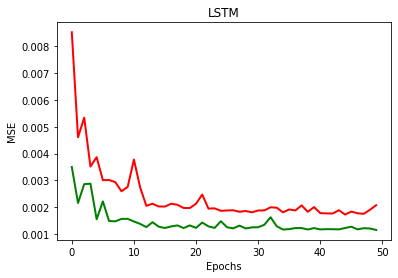

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [23]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)
print(type(targets))
print(preds.shape)
print(y_test)
mean_absolute_error(preds, y_test)

6/6 [==============================] - 0s 3ms/step
<class 'pandas.core.series.Series'>
(190,)
[ 0.11406719  0.13100206  0.16973536  0.15933929  0.15598996  0.12971655
  0.12610335  0.10591729  0.116423    0.05641361  0.04263786  0.03514622
  0.0537764   0.03511452  0.12346941  0.04272141  0.0902618   0.0823452
  0.11942608  0.05968095  0.02346516 -0.0202326  -0.01880027 -0.05798721
 -0.03450701 -0.02982319 -0.03042189 -0.00687965  0.03097743 -0.01737026
  0.02272781  0.03720685  0.04871121  0.00913624 -0.00246801 -0.00558503
  0.01533611 -0.00152491  0.07317467  0.08170575  0.07339938  0.07164728
  0.02773987 -0.03826178 -0.01256824 -0.02438904 -0.07785552 -0.06728424
 -0.10655393 -0.10653392 -0.04524318 -0.02027199 -0.05866143  0.00733195
 -0.01411991 -0.01198178 -0.06801996 -0.00909426  0.00393053  0.01795665
 -0.02621351  0.06158095  0.0335864  -0.05024666 -0.14136762 -0.12848512
 -0.1192913  -0.12041237 -0.07808887 -0.03900218 -0.05735166 -0.02205153
 -0.00428449 -0.05953866  0.028

0.0247852369551023

In [24]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(preds, y_test)
MAE

0.001154712000982121

In [25]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2

0.7810434289477737

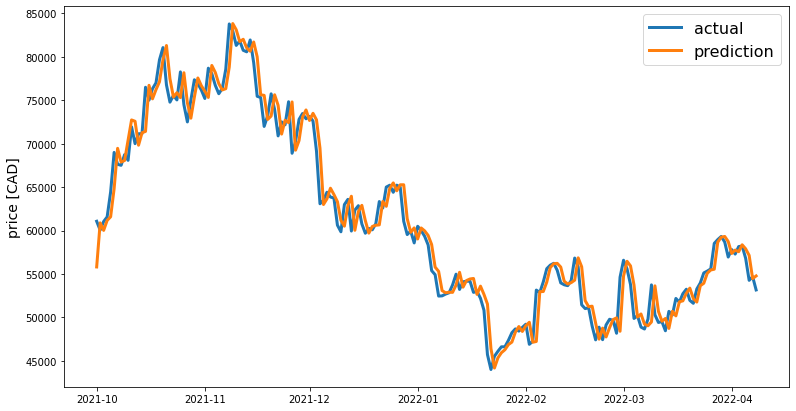

In [26]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

In [27]:
print("hello")

hello


In [30]:
def predict_here(model , recentBatch , number):
    #recent batch contains the last 5 data ponts of hist
    
    recentBatch
    predictive = recentBatch[:]
    while(number>0):
        
        to_predict = extract_window_data(predictive[-window_len:], window_len, zero_base)
        print(to_predict)
        predicted = model.predict(to_predict).squeeze()
        predictive.append(predicted)
        
        number-=1
    
    return predictive
    
    

In [48]:
# MODEL takes input in the format schema(195,5,6)

recentBatch = y_test[-window_len:]
print(recentBatch)
predicted = model.predict([X_test[-1:]])
print(predicted[0])
recentBatch = np.concatenate([np.array(recentBatch), np.array(predicted[0])])
print(recentBatch)                   
print(extract_window_data(recentBatch, window_len, zero_base=False))
#print(predict_here(model, recentBatch , window_len , zero_base = false , 50))

[-0.00784928 -0.00263857 -0.06127827 -0.04532719 -0.08577711]
1/1 [==============================] - 0s 13ms/step
[-0.05806129]
[-0.00784928 -0.00263857 -0.06127827 -0.04532719 -0.08577711 -0.05806129]


AttributeError: 'numpy.ndarray' object has no attribute 'values'